# Julia test notebook

Author: Matthew K. MacLeod

Goals, test the following in Julia:
 * linear algebra
 * statistics
 * visualization

## Background

Julia has some obvious benifits:
* speed
* dynamic nature
* statistical tools of R, linear algebra of matlab, python feel...
* most of source code written in Julia itself

some of my concerns:
* mutability 
* list comprehensions lack conditionals
* lack of tail call optimization
* not yet >= 1.0

Julia is an interesting language which I hope gets more attention.

In [1]:
# these notes work with version 0.5.0-dev+876
VERSION

v"0.5.0-dev+876"

## Introduction to Julia

In [2]:
collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [3]:
# list comps
squares = [i^2 for i in collect(1:10)]  # julia indices start with 1

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [4]:
# could also do 
cubes = [i^3 for i in 1:10]

10-element Array{Int64,1}:
    1
    8
   27
   64
  125
  216
  343
  512
  729
 1000

In [5]:
div(10,3)

3

In [6]:
10 % 3

1

#### IO 

In [7]:
outfile = open("test.txt", "w")

IOStream(<file test.txt>)

In [8]:
for i in 1:10
    println(outfile, "i is $i")
end
close(outfile)

In [9]:
# shell out
;cat test.txt

LoadError: LoadError: syntax: extra token "test" after end of expression
while loading In[9], in expression starting on line 2

In [10]:
infile = open("test.txt", "r")

IOStream(<file test.txt>)

In [11]:
lines = readlines(infile)

10-element Array{ByteString,1}:
 "i is 1\n" 
 "i is 2\n" 
 "i is 3\n" 
 "i is 4\n" 
 "i is 5\n" 
 "i is 6\n" 
 "i is 7\n" 
 "i is 8\n" 
 "i is 9\n" 
 "i is 10\n"

In [12]:
map(split,lines)

10-element Array{Array{SubString{ASCIIString},1},1}:
 SubString{ASCIIString}["i","is","1"] 
 SubString{ASCIIString}["i","is","2"] 
 SubString{ASCIIString}["i","is","3"] 
 SubString{ASCIIString}["i","is","4"] 
 SubString{ASCIIString}["i","is","5"] 
 SubString{ASCIIString}["i","is","6"] 
 SubString{ASCIIString}["i","is","7"] 
 SubString{ASCIIString}["i","is","8"] 
 SubString{ASCIIString}["i","is","9"] 
 SubString{ASCIIString}["i","is","10"]

In [13]:
[float(line[3]) for line in map(split, lines)]

10-element Array{Any,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Linear Algebra

In [14]:
A = [1 2; 3 4]

2x2 Array{Int64,2}:
 1  2
 3  4

In [15]:
eig(A)

([-0.3722813232690143,5.372281323269014],
2x2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377)

In [16]:
eigvals(A)

2-element Array{Float64,1}:
 -0.372281
  5.37228 

In [17]:
inv(A)

2x2 Array{Float64,2}:
 -2.0   1.0
  1.5  -0.5

In [18]:
det(A)

-2.0

In [19]:
norm(A)

5.464985704219043

## Statistics

In [20]:
# uniform random numbers
rand(10)

10-element Array{Float64,1}:
 0.153135 
 0.676651 
 0.0898744
 0.721703 
 0.437054 
 0.288779 
 0.644763 
 0.669163 
 0.427258 
 0.356054 

In [21]:
# random normal numbers
randn(10)

10-element Array{Float64,1}:
 -0.987494
 -2.50852 
  0.51731 
  0.732613
  0.549513
  0.072924
 -0.541111
 -0.468279
  1.92084 
  0.68249 

In [22]:
linspace(1.0,2.0,10)

10-element LinSpace{Float64}:
 1.0,1.11111,1.22222,1.33333,1.44444,1.55556,1.66667,1.77778,1.88889,2.0

## Visualization

In [32]:
using Gadfly, RDatasets, DataFrames

In [24]:
set_default_plot_size(20cm,10cm);

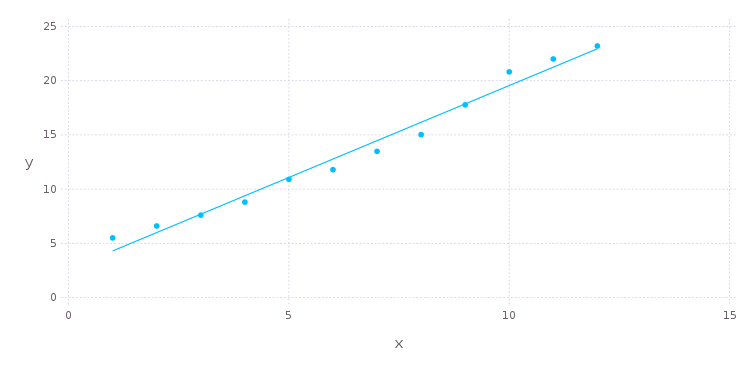

In [25]:
# linear regression 
x = [1.0:12.0;]
y = [5.5, 6.6, 7.6, 8.8, 10.9, 11.79, 13.48, 15.02, 17.77, 20.81, 22.0, 23.2]
a, b = linreg(x, y)  # Linear regression
plot(layer(x=x,y=[a+b*i for i in x], Geom.line),layer(x=x,y=y, Geom.point))

In [26]:
mlm = dataset("mlmRev","Gcsemv")
df = mlm[complete_cases(mlm), :]
println("done")

done


In [27]:
names(df)

5-element Array{Symbol,1}:
 :School 
 :Student
 :Gender 
 :Written
 :Course 

In [28]:
describe(df)

School
Length  1905
Type    Pooled ASCIIString
NAs     0
NA%     0.0%
Unique  73

Student
Length  1905


LoadError: LoadError: ArgumentError: quantiles are undefined in presence of NaNs
while loading In[28], in expression starting on line 1

Type    Pooled ASCIIString
NAs     0
NA%     0.0%
Unique  649

Gender
Length  1905
Type    Pooled ASCIIString
NAs     0
NA%     0.0%
Unique  2

Written


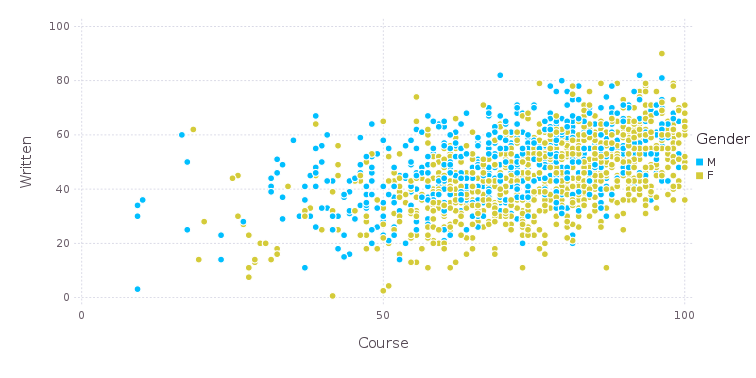

In [29]:
plot(df, x="Course",y="Written", color="Gender")

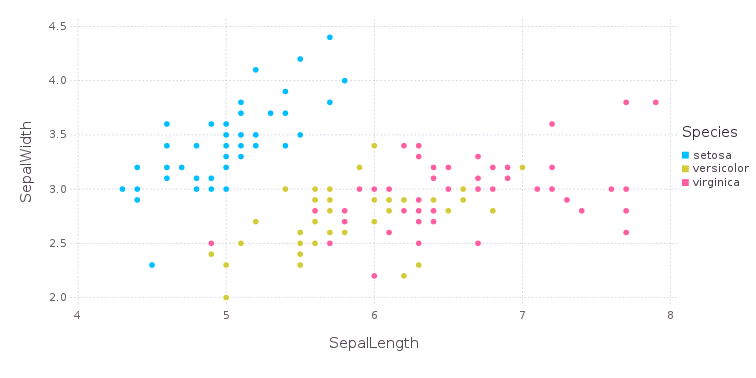

In [30]:
plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth",color="Species", Geom.point)

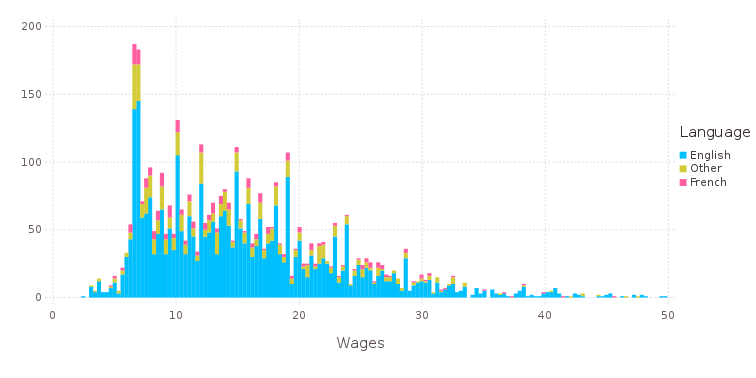

In [31]:
plot(dataset("car", "SLID"), x="Wages", color="Language", Geom.histogram)